In [1]:
import keras

C:\Users\VPL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import keras

In [3]:
print(keras.__version__)

2.2.2


In [4]:
from keras.datasets import mnist
from keras import models, layers

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

(60000, 28, 28)


In [6]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(
    32,
    (3, 3),
    activation="relu",
    input_shape=(28, 28, 1)
))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#first number is the number of shamples
#followed by dimensionality
#print('Train', train_images.shape)
#print('Test:', test_images.shape)

#print one of my images
#matplot... apply a color map, to change it, we use cmap.
#plt.imshow(train_images[10], cmap='gray')
#plt.title(str(train_labels[10]))
#plt.show()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255.0

test_images = test_images.reshape((10000, 28 * 28 ))
test_images = test_images.astype('float32') / 255.0
from keras.utils import to_categorical
print('Before', train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('After', train_labels[1])

Before 5
After [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
#numbers weight and bias al principio are random
model.evaluate(train_images, train_labels)

60000/60000 [==============================] - 30s 501us/step


[2.30251195081075, 0.045533333333333335]

In [9]:
#import numpy as np
#print(np.max(model.predict(train_images[0:1])))
#print(np.argmax(model.predict(train_images[0:1])))
#print(train_labels[0])

In [13]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0243 - acc: 0.9926
Epoch 2/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0197 - acc: 0.9940
Epoch 3/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0155 - acc: 0.9952: 1s - loss: 0.0154 -
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0133 - acc: 0.9959
Epoch 5/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0107 - acc: 0.9971
Epoch 6/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0093 - acc: 0.9972
Epoch 7/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0087 - acc: 0.9975
Epoch 8/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0067 - acc: 0.9981
Epoch 9/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0060 - acc: 0.9981
Epoch 10/10
60000/60000 [==============================] - 84s 1ms/step - loss:

{'loss': [0.1714709870994091, 0.045027610690519214, 0.031581851242405055], 'acc': [0.94725, 0.9862666666666666, 0.9903333333333333]}


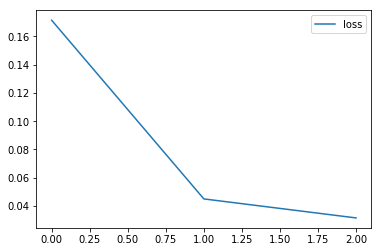

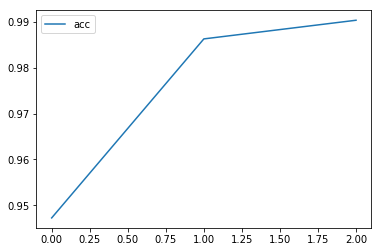

In [11]:
print(history.history)
plt.plot(history.history["loss"], label='loss')
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label='acc')
plt.legend()
plt.show()
plt.close()

In [12]:
test_loss, test_acc = model.evaluate(train_images, train_labels)
print(test_loss, test_acc)

60000/60000 [==============================] - 31s 515us/step
0.021609198440678545 0.9931666666666666
